<a href="https://colab.research.google.com/github/venezianof/booksum/blob/main/module-1/agent-memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-1/agent-memory.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58239417-lesson-7-agent-with-memory)

# Agent memory

## Review

Previously, we built an agent that can:

* `act` - let the model call specific tools
* `observe` - pass the tool output back to the model
* `reason` - let the model reason about the tool output to decide what to do next (e.g., call another tool or just respond directly)

![Screenshot 2024-08-21 at 12.45.32 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab7453080e6802cd1703_agent-memory1.png)

## Goals

Now, we're going extend our agent by introducing memory.

In [56]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

In [57]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

We'll use [LangSmith](https://docs.smith.langchain.com/) for [tracing](https://docs.smith.langchain.com/concepts/tracing).

In [58]:
_set_env("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"

This follows what we did previously.

In [59]:
from langchain_openai import ChatOpenAI

def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

tools = [add, multiply, divide]
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)

In [60]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

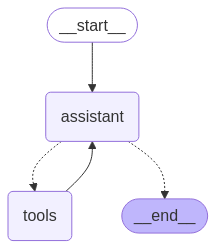

In [61]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

## Memory

Let's run our agent, as before.

In [63]:
messages = [HumanMessage(content="Add 3 and 4.")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-lf-34******************************2672. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [65]:
from langchain_openai import ChatOpenAI

# ... your existing code ...

# Get your API key
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

# ... your existing code ...

# Explicitly set the API key when initializing the ChatOpenAI instance:
llm = ChatOpenAI(model="gpt-4o", openai_api_key=os.environ["OPENAI_API_KEY"])
llm_with_tools = llm.bind_tools(tools)

# ...rest of your existing code...

In [ ]:
from langchain_openai import ChatOpenAI

# ... your existing code ...

# Get your API key
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

# ... your existing code ...

# Explicitly set the API key when initializing the ChatOpenAI instance:
llm = ChatOpenAI(model="gpt-4o", openai_api_key=os.environ["OPENAI_API_KEY"])
llm_with_tools = llm.bind_tools(tools)

# ...rest of your existing code...

In [ ]:
from langchain_openai import ChatOpenAI

# ... (your other function definitions) ...

# Get your API key from environment variable or user input
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

# Explicitly set the API key when initializing the ChatOpenAI instance:
llm = ChatOpenAI(model="gpt-4o", openai_api_key=os.environ["OPENAI_API_KEY"])
llm_with_tools = llm.bind_tools(tools)

# ... (rest of your code) ...

In [ ]:
from langchain_openai import ChatOpenAI

# ... your existing code ...

# Get your API key
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

# ... your existing code ...

# Explicitly set the API key when initializing the ChatOpenAI instance:
llm = ChatOpenAI(model="gpt-4o", openai_api_key=os.environ["OPENAI_API_KEY"])
llm_with_tools = llm.bind_tools(tools)

# ...rest of your existing code...

In [66]:
from langchain_openai import ChatOpenAI

# ... your existing code ...

# Get your API key
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

# ... your existing code ...

# Explicitly set the API key when initializing the ChatOpenAI instance:
llm = ChatOpenAI(model="gpt-4o", openai_api_key=os.environ["OPENAI_API_KEY"])
llm_with_tools = llm.bind_tools(tools)

# ...rest of your existing code...

Now, let's multiply by 2!

In [68]:
messages = [HumanMessage(content="Multiply that by 2.")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-lf-34******************************2672. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [69]:
import os
    os.environ["OPENAI_API_KEY"] = "YOUR_ACTUAL_API_KEY" # Replace with your API key

IndentationError: unexpected indent (<ipython-input-69-37bb70fc0792>, line 2)

In [71]:
import os
    from langchain_openai import ChatOpenAI
    llm = ChatOpenAI(model="gpt-4o", openai_api_key=os.environ["OPENAI_API_KEY"])
    llm.invoke("Hello!")

IndentationError: unexpected indent (<ipython-input-71-2e08a26bd55c>, line 2)

We don't retain memory of 7 from our initial chat!

This is because [state is transient](https://github.com/langchain-ai/langgraph/discussions/352#discussioncomment-9291220) to a single graph execution.

Of course, this limits our ability to have multi-turn conversations with interruptions.

We can use [persistence](https://langchain-ai.github.io/langgraph/how-tos/persistence/) to address this!

LangGraph can use a checkpointer to automatically save the graph state after each step.

This built-in persistence layer gives us memory, allowing LangGraph to pick up from the last state update.

One of the easiest checkpointers to use is the `MemorySaver`, an in-memory key-value store for Graph state.

All we need to do is simply compile the graph with a checkpointer, and our graph has memory!

In [72]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
react_graph_memory = builder.compile(checkpointer=memory)

When we use memory, we need to specify a `thread_id`.

This `thread_id` will store our collection of graph states.

Here is a cartoon:

* The checkpointer write the state at every step of the graph
* These checkpoints are saved in a thread
* We can access that thread in the future using the `thread_id`

![state.jpg](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e0e9f526b41a4ed9e2d28b_agent-memory2.png)


In [73]:
# Specify a thread
config = {"configurable": {"thread_id": "1"}}

# Specify an input
messages = [HumanMessage(content="Add 3 and 4.")]

# Run
messages = react_graph_memory.invoke({"messages": messages},config)
for m in messages['messages']:
    m.pretty_print()

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-lf-34******************************2672. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

If we pass the same `thread_id`, then we can proceed from from the previously logged state checkpoint!

In this case, the above conversation is captured in the thread.

The `HumanMessage` we pass (`"Multiply that by 2."`) is appended to the above conversation.

So, the model now know that `that` refers to the `The sum of 3 and 4 is 7.`.

In [74]:
messages = [HumanMessage(content="Multiply that by 2.")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-lf-34******************************2672. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

## LangGraph Studio


**⚠️ DISCLAIMER**

Since the filming of these videos, we've updated Studio so that it can be run locally and opened in your browser. This is now the preferred way to run Studio (rather than using the Desktop App as shown in the video). See documentation [here](https://langchain-ai.github.io/langgraph/concepts/langgraph_studio/#local-development-server) on the local development server and [here](https://langchain-ai.github.io/langgraph/how-tos/local-studio/#run-the-development-server). To start the local development server, run the following command in your terminal in the `module-1/studio/` directory in this module:

```
langgraph dev
```

In [77]:
!pip install langchain openai tiktoken

from langchain.llms import OpenAI
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.docstore.document import Document

# Replace with your OpenAI API key
import os
os.environ["OPENAI_API_KEY"] = "YOUR_ACTUAL_API_KEY"


# Initialize the OpenAI language model
llm = OpenAI(temperature=0.7)

# Sample text to summarize
text = """
LangChain is a powerful framework for developing applications powered by language models. It provides a set of tools and abstractions for working with LLMs, including prompting, chaining, and memory. By simplifying the development process, LangChain makes it easier to build sophisticated AI-driven applications.
"""

# Split the text into smaller chunks for processing
text_splitter = CharacterTextSplitter()
texts = text_splitter.split_text(text)

# Create a LangChain document object
docs = [Document(page_content=t) for t in texts]

# Load a summarization chain
chain = load_summarize_chain(llm, chain_type="stuff")

# Generate the summary
summary = chain.run(docs)

# Print the summary
print(summary)

ModuleNotFoundError: No module named 'langchain_community'

In [78]:
!pip install langchain openai tiktoken langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
